## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [39]:
# Use this cell to begin your analysis, and add as many as you would like!
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [40]:
office_df = pd.read_csv('datasets/office_episodes.csv')

In [41]:
office_colors = []
for rating in office_df['scaled_ratings']:
    if rating < 0.25:
        office_colors.append('red')
    elif (rating >= 0.25) & (rating < 0.5):
        office_colors.append('orange')
    elif (rating >= 0.5) & (rating < 0.75):
        office_colors.append('lightgreen')
    else:
        office_colors.append('darkgreen')

In [42]:
guest_size = []

for statement in office_df['has_guests']:
    if statement:
        guest_size.append(250)
    else:
        guest_size.append(25)

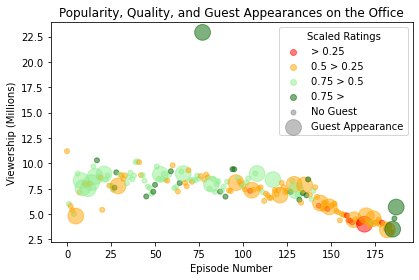

In [43]:
fig = plt.figure()
plt.scatter('episode_number', 'viewership_mil', data = office_df, c = office_colors, s = guest_size, alpha = 0.5, label = '')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')


col_list = ['red','orange','lightgreen','darkgreen']
rating_list = ['> 0.25', '0.5 > 0.25', '0.75 > 0.5', '0.75 >']

for item in range(len(col_list)):
    plt.scatter([],[], c = col_list[item], label = rating_list[item], alpha = 0.5)
    plt.legend()
    
size_list = [25, 250]
size_desc = ['No Guest','Guest Appearance']

for item in range(len(size_list)):
    plt.scatter([],[], c = 'grey', s = size_list[item], label = size_desc[item], alpha = 0.5)
    plt.legend(title = 'Scaled Ratings')

plt.show()

In [44]:
office_stars = office_df[office_df['has_guests'] == True]
office_stars.sort_values('viewership_mil', ascending = False)
top_star = 'Jack Black'